In [1]:
# For Linear Regression Model
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Exploratory Data Analysis and Data Understanding

In [3]:
# Replace 'your_file.csv' with the actual file name and path
file_path = '/content/drive/MyDrive/Assessment/Energy_consumption_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     0  Saturday      No    25.139433  43.431581    1565.693999   
1      1     1  Saturday      No    27.731651  54.225919    1411.064918   
2      1     2  Saturday      No    28.704277  58.907658    1755.715009   
3      1     3  Saturday      No    20.080469  50.371637    1452.316318   
4      1     4  Saturday      No    23.097359  51.401421    1094.130359   

   Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0          5        On           Off         2.774699          75.364373  
1          1        On            On        21.831384          83.401855  
2          2       Off           Off         6.764672          78.270888  
3          1       Off            On         8.623447                NaN  
4          9        On           Off         3.071969          70.811732

1. When and by whom was the dataset created?<br>
The dataset was created by Jinil Patel on 2024

---


2. How did you access the dataset?<br>
I accessed the dataset from Kaggle

---


3. How does it align with the chosen UNSDG?<br>
Aligned with SDG 7: Affordable and Clean Energy, this project aims to optimize
energy usage, encourage renewable energy adoption, and support sustainable
urban development. Insights from this project could aid policymakers and building managers in designing smarter energy management systems.

---
4. List all the attributes (columns) present in the dataset.




In [4]:
df.columns

Index(['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage',
       'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')

In [5]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)


Null values in each column:
Month                  0
Hour                   0
DayOfWeek              0
Holiday                0
Temperature            0
Humidity               0
SquareFootage          0
Occupancy              0
HVACUsage              0
LightingUsage        500
RenewableEnergy        0
EnergyConsumption    500
dtype: int64


In [6]:
df = df.dropna()


In [7]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)


Null values in each column:
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


In [8]:
# Check the number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Total Number Duplicate Rows:", duplicate_count)

# Show duplicate rows
df[df.duplicated()]

Total Number Duplicate Rows: 0


Empty DataFrame
Columns: [Month, Hour, DayOfWeek, Holiday, Temperature, Humidity, SquareFootage, Occupancy, HVACUsage, LightingUsage, RenewableEnergy, EnergyConsumption]
Index: []

Since there are no dublicated rows, now we will be handling the missing values.


In [9]:
# Check for missing values before handling
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


So there are no missing values.

In [10]:
print(df.describe())  # Summary statistics for numerical columns


             Month         Hour  Temperature     Humidity  SquareFootage  \
count  4047.000000  4047.000000  4047.000000  4047.000000    4047.000000   
mean      6.266864    11.572029    24.979738    45.398954    1507.673570   
std       3.595247     6.880283     3.049184     8.954084     290.960773   
min       1.000000     0.000000    20.007565    30.015975    1000.512661   
25%       3.000000     6.000000    22.465070    38.086836    1260.374017   
50%       6.000000    12.000000    24.932388    45.658529    1513.368555   
75%       9.000000    18.000000    27.441347    52.580374    1751.598317   
max      12.000000    23.000000    29.998671    59.969085    1999.982252   

         Occupancy  RenewableEnergy  EnergyConsumption  
count  4047.000000      4047.000000        4047.000000  
mean      4.583148        15.362776          76.849239  
std       2.898249         9.173042           9.268925  
min       0.000000         0.006642          53.263278  
25%       2.000000         7.5

In [11]:
df['DayOfWeek'] = df['DayOfWeek'].astype('category').cat.codes


In [12]:

# Mapping dictionary
mapping_dict = {
    'Holiday': {'No': 0, 'Yes': 1},
    'HVACUsage': {'On': 1, 'Off': 0},
    'LightingUsage': {'On': 1, 'Off': 0},
}

# Fill NaN values in categorical columns before mapping
df['LightingUsage'] = df['LightingUsage'].fillna('Off')

# Apply mappings
for column, mapping in mapping_dict.items():
    df[column] = df[column].map(mapping)

# Convert boolean columns to integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Display first few rows of the processed DataFrame
print(df.head())

   Month  Hour  DayOfWeek  Holiday  Temperature   Humidity  SquareFootage  \
0      1     0          2        0    25.139433  43.431581    1565.693999   
1      1     1          2        0    27.731651  54.225919    1411.064918   
2      1     2          2        0    28.704277  58.907658    1755.715009   
4      1     4          2        0    23.097359  51.401421    1094.130359   
5      1     5          2        1    29.576037  36.824263    1871.709180   

   Occupancy  HVACUsage  LightingUsage  RenewableEnergy  EnergyConsumption  
0          5          1              0         2.774699          75.364373  
1          1          1              1        21.831384          83.401855  
2          2          0              0         6.764672          78.270888  
4          9          1              0         3.071969          70.811732  
5          6          0              0        17.626690          84.321885  


In [13]:
unique_values = {feature: {'count': df[feature].nunique(), 'values': df[feature].unique()} for feature in df.select_dtypes(include='object').columns}
unique_values

{}

In [14]:
print(df.dtypes)


Month                  int64
Hour                   int64
DayOfWeek               int8
Holiday                int64
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage              int64
LightingUsage          int64
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object


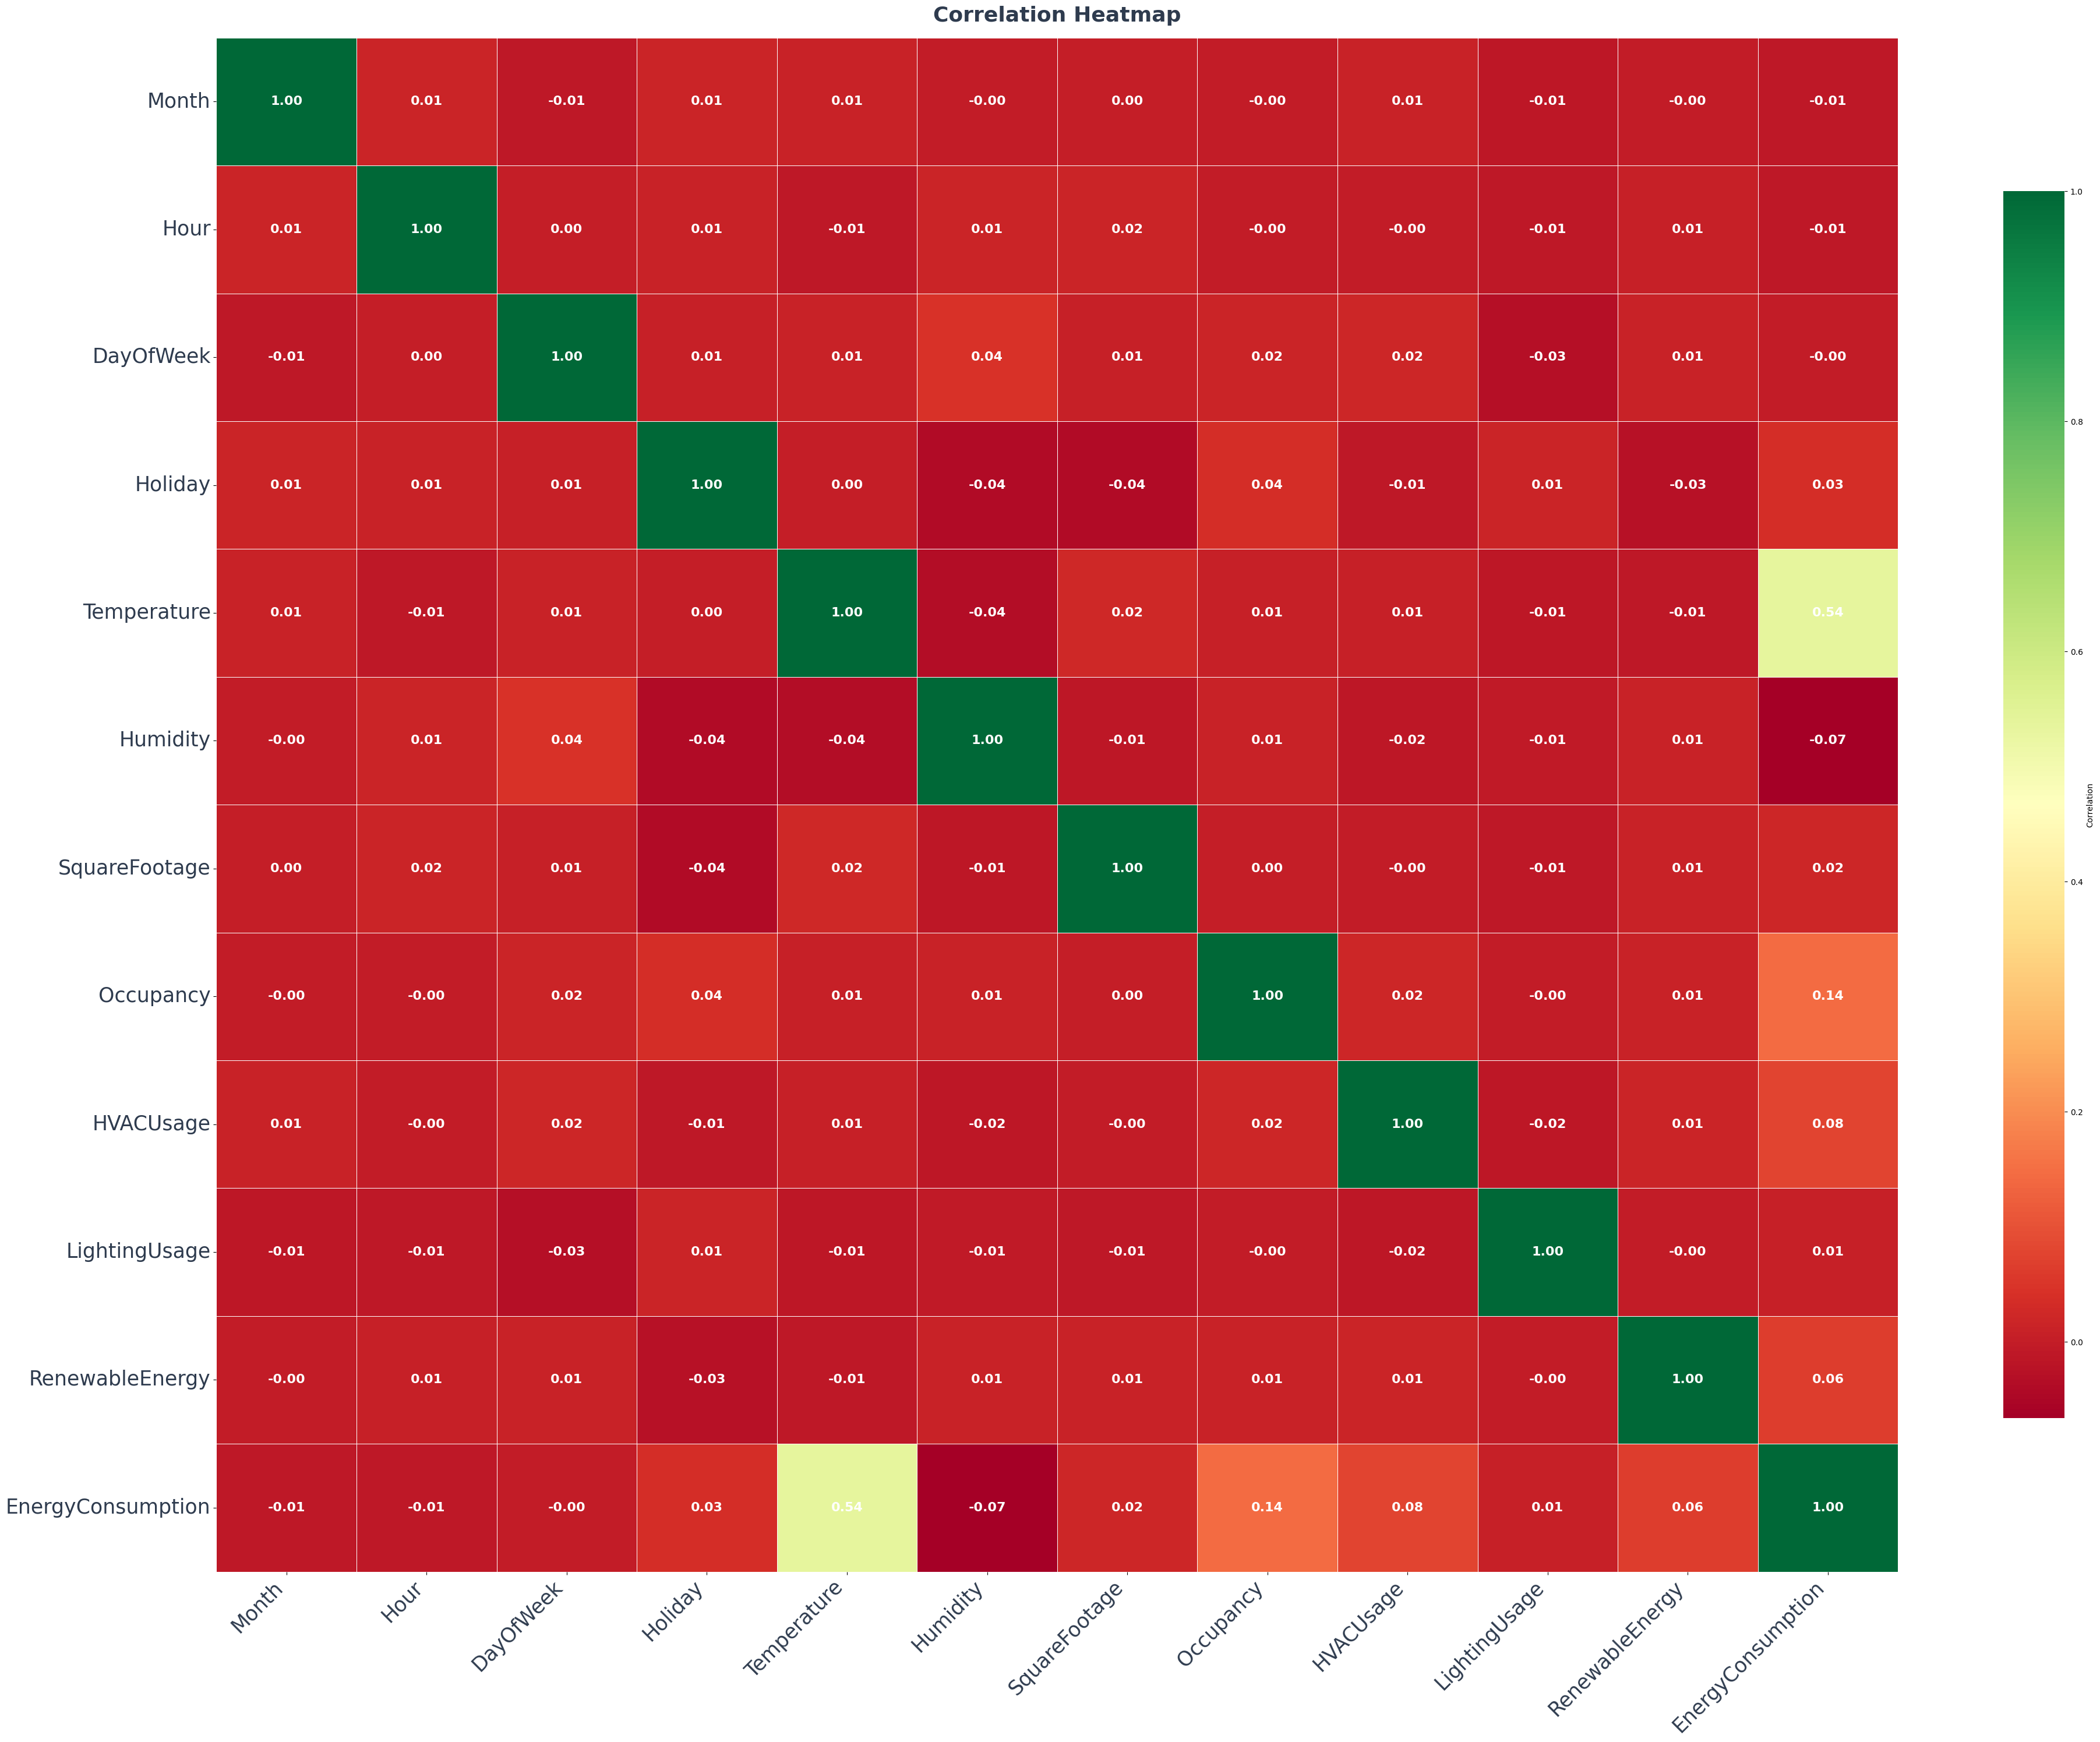

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Set up the figure size for a large, clear plot
plt.figure(figsize=(40, 30))

# Heatmap with enhanced style and a more appealing color palette
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, linecolor='white',
            annot_kws={'size': 16, 'weight': 'bold', 'color': 'white'}, cbar_kws={'shrink': 0.8, 'label': 'Correlation'})

# Customizing title and labels
plt.title('Correlation Heatmap', fontsize=26, weight='bold', color='#2E3B4E', pad=20)
plt.xticks(fontsize=25, rotation=45, ha='right', color='#2E3B4E')
plt.yticks(fontsize=25, rotation=0, color='#2E3B4E')

# Adding gridlines for better readability
plt.grid(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


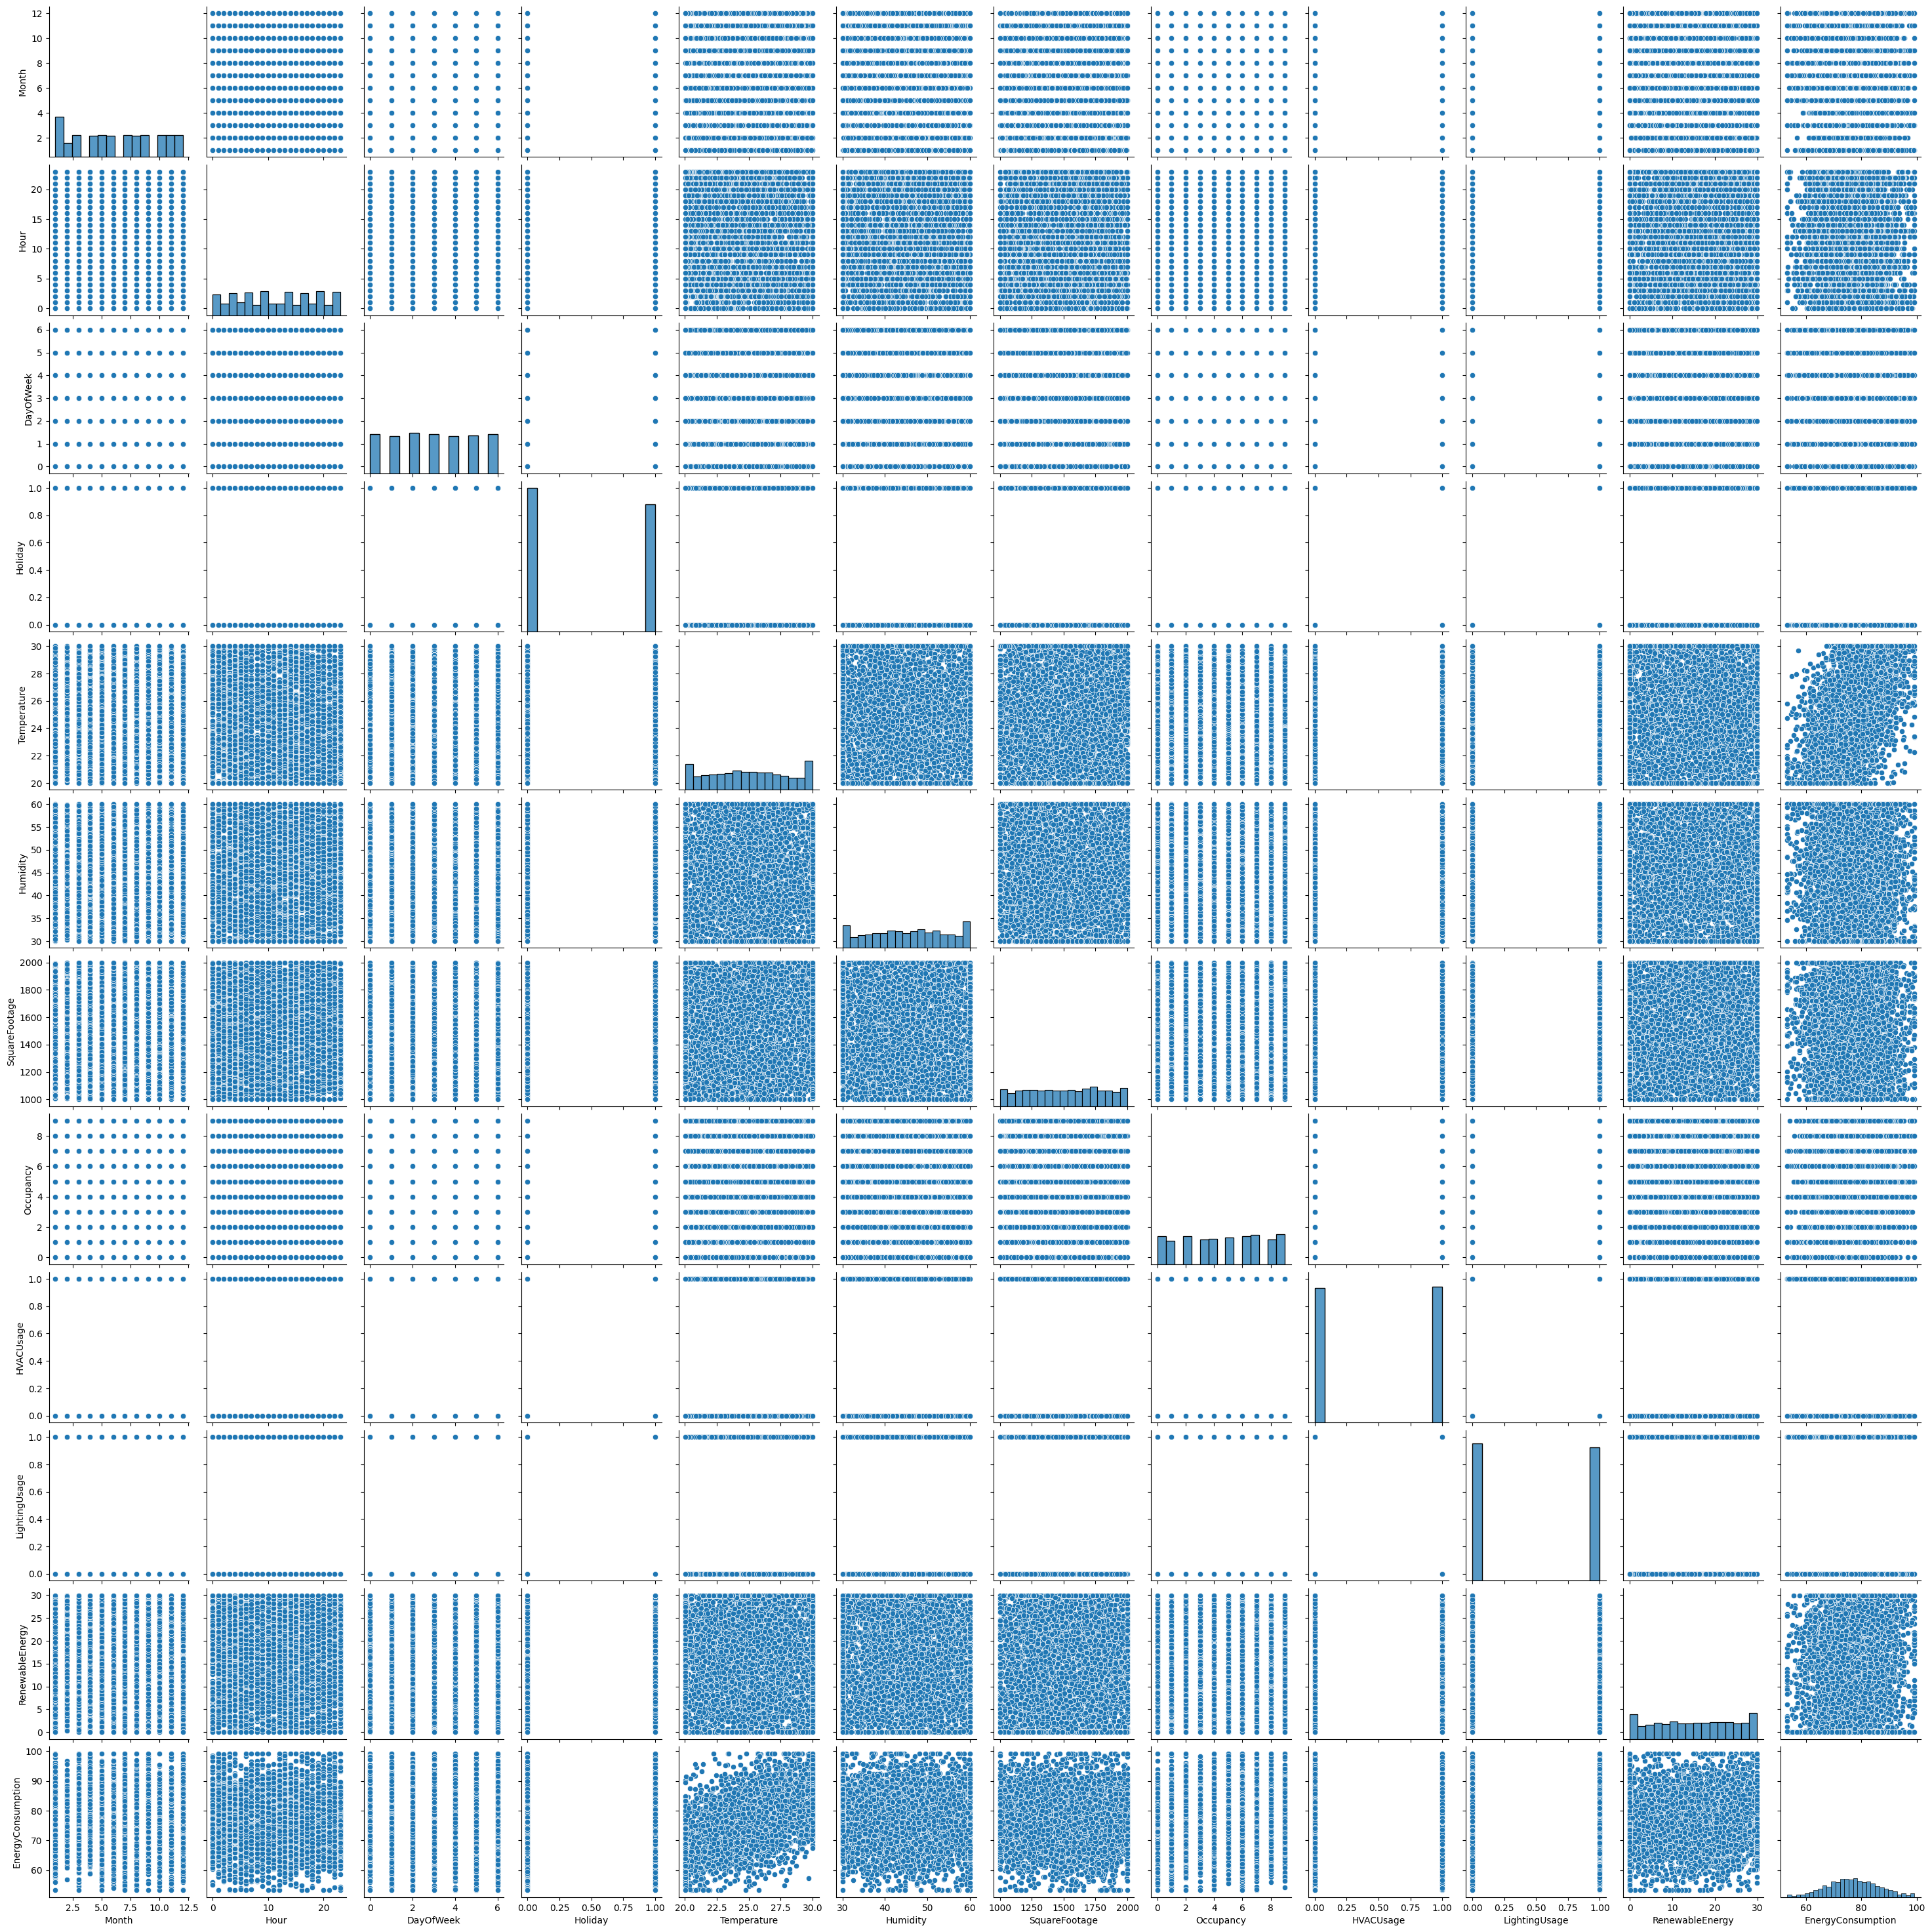

In [16]:
sns.pairplot(df)
plt.show()



Outliers in each column: {'Temperature': 0, 'Humidity': 0, 'SquareFootage': 0, 'RenewableEnergy': 0, 'EnergyConsumption': 0}


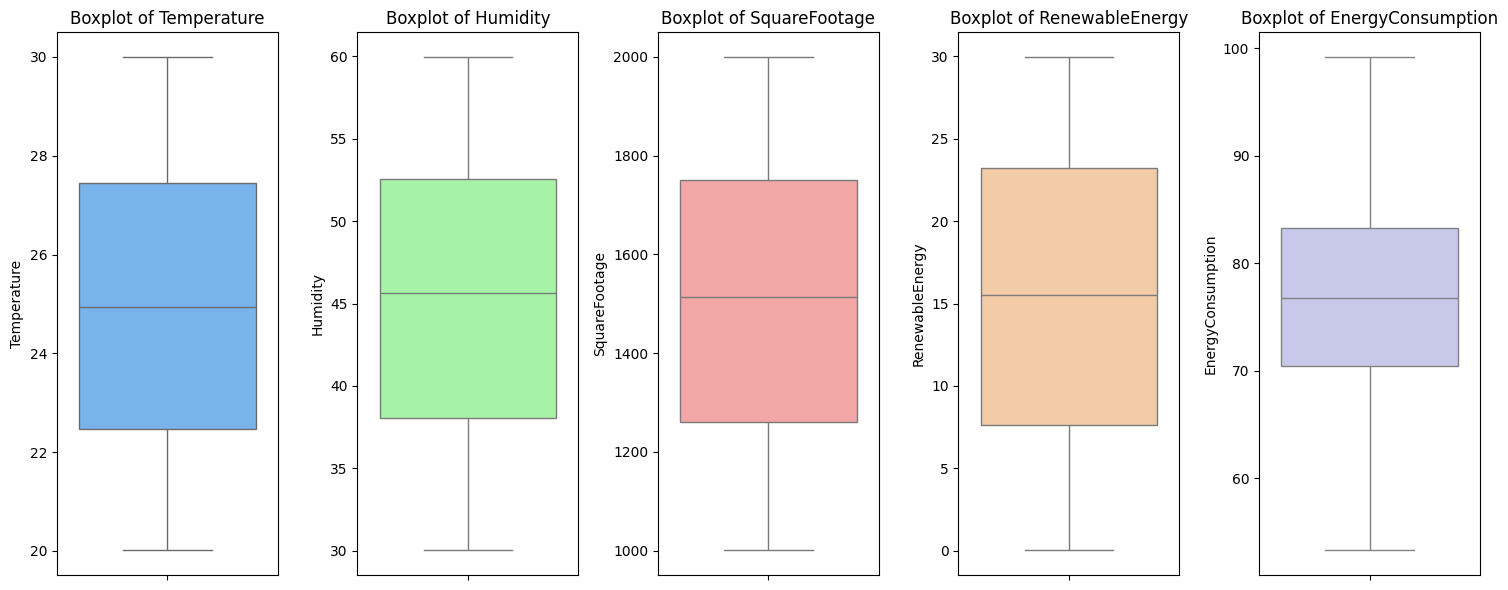

In [17]:
# Function to check outliers
def check_outliers(df):
    outlier_counts = {}
    numerical_features = df.select_dtypes(include=['float64']).columns
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[feature] < lower_limit) | (df[feature] > upper_limit)]
        outlier_counts[feature] = len(outliers)

    return outlier_counts

# Print outlier counts
print("Outliers in each column:", check_outliers(df))

# Select numerical features for boxplots
features = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']

plt.figure(figsize=(15, 6))
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#c2c2f0']  # Add more colors

# Create subplots dynamically based on the number of features
for i in range(len(features)):
    plt.subplot(1, len(features), i + 1)  # Adjusted to match feature count
    sns.boxplot(data=df, y=features[i], color=colors[i])  # Use y for vertical boxplots
    plt.title(f'Boxplot of {features[i]}')

plt.tight_layout()
plt.show()


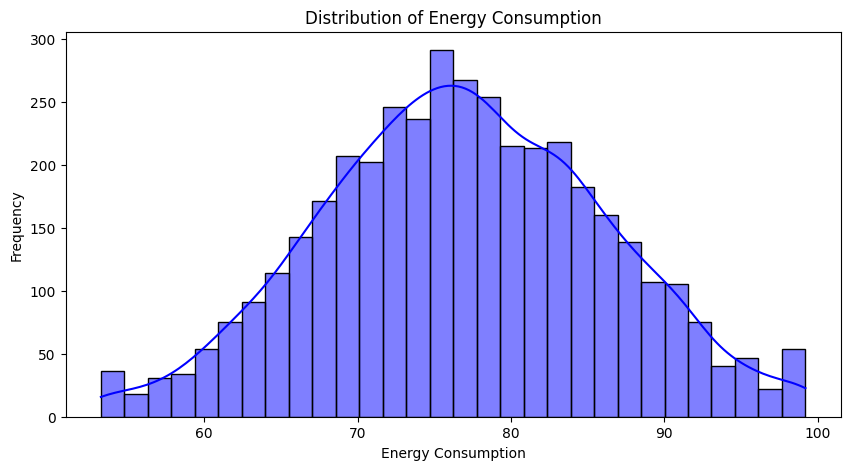

0.006069488924464525


In [18]:
# Energy Consumption Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["EnergyConsumption"], bins=30, kde=True, color="blue")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.show()
from scipy.stats import skew
skewness = skew(df["EnergyConsumption"])
print(skewness)


The distribution of energy consumption appears to be nearly normal, as indicated by the bell-shaped histogram. The skewness value of 0.0061 suggests that the data is highly symmetrical, with no significant right or left skew. This means that energy consumption values are fairly balanced around the mean, with no extreme deviations. The spread of the data seems moderate, indicating that consumption does not fluctuate drastically. Additionally, there are no obvious outliers, further supporting the idea of a well-distributed dataset. Given its near-normal nature, no transformations are necessary.

---



<ipython-input-19-822f4090cbb6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="EnergyConsumption", data=df, estimator="mean", ci=None, marker="o", color="red")


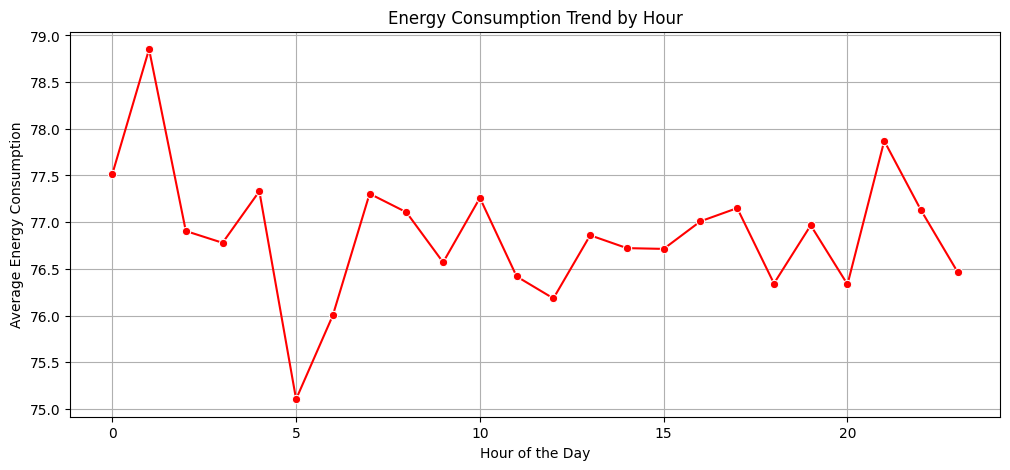

In [19]:
# Energy Consumption Trend by Hour
plt.figure(figsize=(12, 5))
sns.lineplot(x="Hour", y="EnergyConsumption", data=df, estimator="mean", ci=None, marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Energy Consumption")
plt.title("Energy Consumption Trend by Hour")
plt.grid(True)
plt.show()

We started by inspecting the dataset, checking data types, and identifying unique categorical values. A correlation heatmap revealed relationships between numerical features, while a pairplot visualized their interactions. Outliers were checked using the IQR method and boxplots. The Energy Consumption distribution was analyzed using a histogram and skewness, confirming its symmetry. Finally, a trend analysis of energy consumption by hour highlighted daily usage patterns.

With this EDA complete, we now move to building a model from scratch.

---



# Building a Model From Scratch

### Building Linear Regression from scratch

In [20]:
# Defining the independent and dependent variables
X = df.drop(columns=['EnergyConsumption'])  # 'EnergyConsumption' as the dependent variable
y = df['EnergyConsumption']

# Splitting the dataset
split_index = int(len(X) * 0.8)
np.random.seed(10)
shuffled_indices = np.random.permutation(len(X))
X, y = X.iloc[shuffled_indices], y.iloc[shuffled_indices]
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Scaling the features
mean_X_train = X_train.mean(axis=0)
std_X_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled = (X_test - mean_X_train) / std_X_train

print(f"Training Set Size: {X_train.shape[0]} rows")
print(f"Test Set Size: {X_test.shape[0]} rows")

Training Set Size: 3237 rows
Test Set Size: 810 rows


In [21]:
import numpy as np

def initialize_weights(n_features):
    """
    Initialize weight vector and bias term for linear regression model.

    Parameters:
        n_features (int): Number of features/independent variables in the dataset

    Returns:
        tuple: A tuple containing:
            - w (numpy.ndarray): Weight vector initialized with zeros, shape (n_features,)
            - b (float): Bias term initialized to zero

    Example:
        >>> weights, bias = initialize_weights(3)
        >>> print(weights)  # array([0., 0., 0.])
        >>> print(bias)     # 0
    """
    w = np.zeros(n_features)
    b = 0
    return w, b

def predict(X, w, b):
    """
    Generate predictions using the linear regression model formula: y = Xw + b.

    Parameters:
        X (numpy.ndarray): Input feature matrix of shape (n_samples, n_features)
        w (numpy.ndarray): Weight vector of shape (n_features,)
        b (float): Bias term

    Returns:
        numpy.ndarray: Predicted values of shape (n_samples,)

    Example:
        >>> X = np.array([[1, 2], [3, 4]])
        >>> w = np.array([0.5, 0.5])
        >>> b = 0.1
        >>> predictions = predict(X, w, b)
        >>> print(predictions)  # array([1.6, 3.6])
    """
    return np.dot(X, w) + b

def compute_cost(y_true, y_pred):
    """
    Compute the Mean Squared Error (MSE) cost function.

    Parameters:
        y_true (numpy.ndarray): True target values
        y_pred (numpy.ndarray): Predicted values from the model

    Returns:
        float: The computed cost (Mean Squared Error)

    Example:
        >>> y_true = np.array([1, 2, 3])
        >>> y_pred = np.array([1.1, 2.1, 2.9])
        >>> cost = compute_cost(y_true, y_pred)
        >>> print(cost)
    """
    m = len(y_true)
    return np.sum((y_pred - y_true) ** 2) / (2 * m)

def compute_gradients(X, y_true, y_pred):
    """
    Compute the gradients of the cost function with respect to the model's parameters.

    Parameters:
        X (numpy.ndarray): Input feature matrix of shape (m, n_features)
        y_true (numpy.ndarray): True target values
        y_pred (numpy.ndarray): Predicted values from the model

    Returns:
        tuple: Gradients of the cost function (dw, db)

    Example:
        >>> X = np.array([[1, 2], [3, 4], [5, 6]])
        >>> y_true = np.array([1, 2, 3])
        >>> y_pred = np.array([1.1, 2.1, 2.9])
        >>> dw, db = compute_gradients(X, y_true, y_pred)
        >>> print(dw, db)
    """
    m = len(y_true)
    dw = np.dot(X.T, (y_pred - y_true)) / m
    db = np.sum(y_pred - y_true) / m
    return dw, db

def train(X, y, learning_rate=0.001, n_iter=3000):
    """
    Train a Linear Regression model using Gradient Descent optimization.

    This function applies the gradient descent algorithm to minimize the cost function
    (Mean Squared Error) by iteratively updating the model's parameters (weights and bias).

    Parameters:
    ----------
    X : numpy.ndarray
        A numpy array of shape (m, n_features) representing the input feature matrix,
        where m is the number of data points and n_features is the number of features.
        Each row corresponds to a data point, and each column corresponds to a feature.

    y : numpy.ndarray
        A numpy array of shape (m, ) containing the true target values. These are the actual
        observed values that the model is attempting to predict.

    learning_rate : float, optional, default=0.001
        The learning rate that controls the size of the steps taken during gradient descent.
        A higher learning rate can speed up convergence but may lead to overshooting,
        while a lower learning rate provides more stable but slower convergence.

    n_inter : int, optional, default=2000
        The number of iterations (n_inter) to run the gradient descent algorithm.
        Each iteration corresponds to one complete pass through the entire dataset.

    Returns:
    -------
    tuple
        A tuple containing:
        - w (numpy.ndarray): The final trained weights of the model, of shape (n_features,).
        - b (float): The final trained bias of the model.

    Notes:
    ------
    - In each iteration, the model computes predictions, evaluates the cost, calculates the
      gradients with respect to the weights and bias, and then updates the weights and bias
      using the gradients and the learning rate.
    - The training process stops after the specified number of iteration, but early stopping or
      convergence criteria can be added to improve efficiency.
    - The function prints the cost at every 100th iteration to help monitor the optimization process.

    Example:
    --------
    X = np.array([[1, 2], [3, 4], [5, 6]])
    y = np.array([1, 2, 3])
    w, b = train(X, y, learning_rate=0.01, n_iter=1000)
    print("Trained weights:", w)
    print("Trained bias:", b)
    """
    m, n_features = X.shape
    w, b = initialize_weights(n_features)
    costs = []

    for n_iter in range(n_iter):
        y_pred = predict(X, w, b)
        cost = compute_cost(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)

        #update weights and bias using gradient descent
        w -= learning_rate * dw
        b -= learning_rate * db

        costs.append(cost)

        if n_iter % 100 == 0:
            print(f"Iteration {n_iter}: Cost = {cost:.4f}")

    return w, b, costs




In [22]:
def mean_absolute_error(y_true, y_pred):
    """Compute Mean Absolute Error (MAE)."""
    return np.sum(np.abs(y_true - y_pred)) / len(y_true)

def mean_squared_error(y_true, y_pred):
    """Compute Mean Squared Error (MSE)."""
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

def root_mean_squared_error(y_true, y_pred):
    """Compute Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    """Compute R-squared (R² Score)."""
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    explained_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (explained_variance / total_variance)


In [23]:
w, b, costs = train(X_train_scaled, y_train, learning_rate=0.001, n_iter=2000)

# Final weights and bias
print("\nFinal weights:", w)
print("Final bias:", b)


Iteration 0: Cost = 2987.3145
Iteration 100: Cost = 2450.8776
Iteration 200: Cost = 2011.7302
Iteration 300: Cost = 1652.2275
Iteration 400: Cost = 1357.9248
Iteration 500: Cost = 1116.9971
Iteration 600: Cost = 919.7643
Iteration 700: Cost = 758.3015
Iteration 800: Cost = 626.1216
Iteration 900: Cost = 517.9138
Iteration 1000: Cost = 429.3303
Iteration 1100: Cost = 356.8122
Iteration 1200: Cost = 297.4458
Iteration 1300: Cost = 248.8459
Iteration 1400: Cost = 209.0600
Iteration 1500: Cost = 176.4895
Iteration 1600: Cost = 149.8258
Iteration 1700: Cost = 127.9977
Iteration 1800: Cost = 110.1283
Iteration 1900: Cost = 95.4996

Final weights: [-0.176983   -0.07639458  0.06275142  0.25054626  4.3714255  -0.46941675
  0.1455359   1.12718304  0.57277716  0.10355874  0.61770012]
Final bias: 66.35269490986573


In [24]:
print(costs[:10])  # Check the first 10 cost values


[2987.314483120861, 2981.4013991684405, 2975.500136324943, 2969.6106709579053, 2963.7329794821107, 2957.867038359492, 2952.0128240990425, 2946.1703132567172, 2940.3394824353404, 2934.5203082845123]


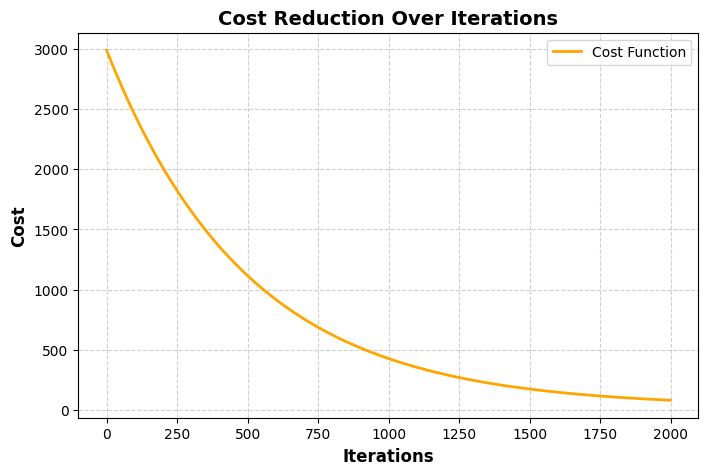

In [25]:
import matplotlib.pyplot as plt

 # Beautified Cost Plot
plt.figure(figsize=(8, 5))
plt.plot(range(len(costs)), costs, label="Cost Function", color='#FFA500', linewidth=2)
plt.xlabel("Iterations", fontsize=12, fontweight='bold')
plt.ylabel("Cost", fontsize=12, fontweight='bold')
plt.title("Cost Reduction Over Iterations", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Since the cost is decreasing gradually, now we can predict on both training and testing data.

In [26]:

# Predictions
y_train_pred = predict(X_train_scaled, w, b)
y_test_pred = predict(X_test_scaled, w, b)

# Compute performance metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Compute performance metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("\nTraining Set Metrics:")
print(f"MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")



Training Set Metrics:
MAE: 11.0343, MSE: 167.0476, RMSE: 12.9247, R²: -0.9038

Test Set Metrics:
MAE: 11.2927, MSE: 172.3277, RMSE: 13.1274, R²: -1.2038


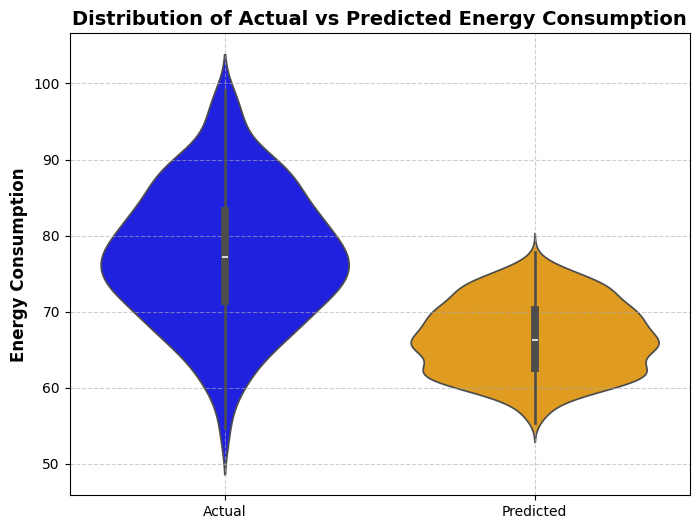

In [27]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.violinplot(data=[y_test, y_test_pred], palette=['blue', 'orange'])
plt.xticks([0, 1], ['Actual', 'Predicted'])
plt.ylabel('Energy Consumption', fontsize=12, fontweight='bold')
plt.title('Distribution of Actual vs Predicted Energy Consumption', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


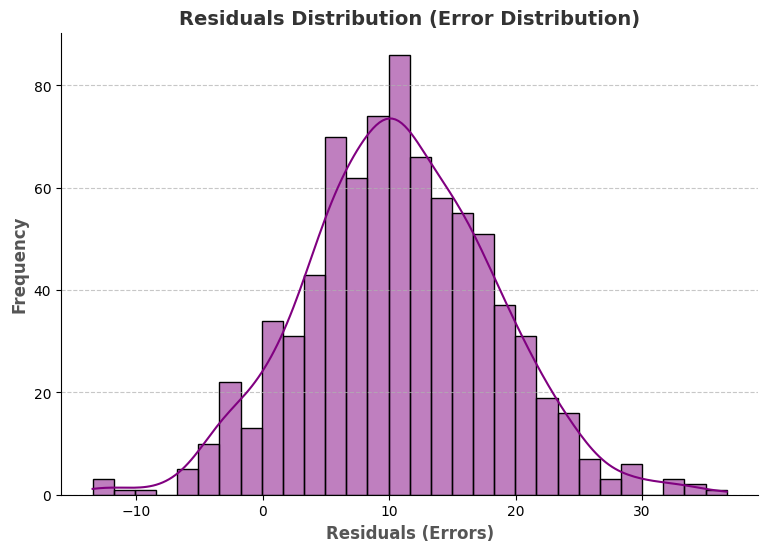

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_test_pred

# Create the plot
plt.figure(figsize=(9, 6))
sns.histplot(residuals, bins=30, kde=True, color='Purple', edgecolor='black')

# Enhance appearance
plt.title('Residuals Distribution (Error Distribution)', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Residuals (Errors)', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#555555')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove unnecessary spines
sns.despine()

# Show the plot
plt.show()


Training Set: The model explains -90.38% of the variance, with an average prediction error of 11.03.

---


Test Set: The model explains -120.38% of the variance, with an average error of 11.29.

---


The negative R² values indicate poor performance, meaning the model is worse than a mean-based prediction.

---


Residuals show right skewness, suggesting underestimation in some cases.

---


Consider feature engineering, trying tree-based models (Random Forest, Decision Tree), and hyperparameter tuning for improvement.

# Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
def evaluate_model(y_true, y_pred):
    """
    Calculate evaluation metrics for a regression model.

    Parameters:
    - y_true (array-like): Actual target values.
    - y_pred (array-like): Predicted values.

    Returns:
    - mae (float): Mean Absolute Error (MAE)
    - mse (float): Mean Squared Error (MSE)
    - rmse (float): Root Mean Squared Error (RMSE)
    - r2 (float): R-squared (R²) score
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

    # Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_regressor.predict(X_train)
y_test_pred_dt = dt_regressor.predict(X_test)

# Evaluate model performance
# on training set
mae_train_dt, mse_train_dt, rmse_train_dt, r2_train_dt = evaluate_model(y_train, y_train_pred_dt)

# on test set
mae_test_dt, mse_test_dt, rmse_test_dt, r2_test_dt = evaluate_model(y_test, y_test_pred_dt)

In [31]:
print("\nDecision Tree Test Set Metrics:")

print("\nTraining Data:")
print(f"Mean Absolute Error (MAE): {mae_train_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_train_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_dt:.4f}")
print(f"R-squared (R² Score): {r2_train_dt:.4f}")

print("\nTest Data:")
print(f"Mean Absolute Error (MAE): {mae_test_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_test_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_dt:.4f}")
print(f"R-squared (R² Score): {r2_test_dt:.4f}")


Decision Tree Test Set Metrics:

Training Data:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R² Score): 1.0000

Test Data:
Mean Absolute Error (MAE): 8.9459
Mean Squared Error (MSE): 129.6199
Root Mean Squared Error (RMSE): 11.3851
R-squared (R² Score): -0.6577


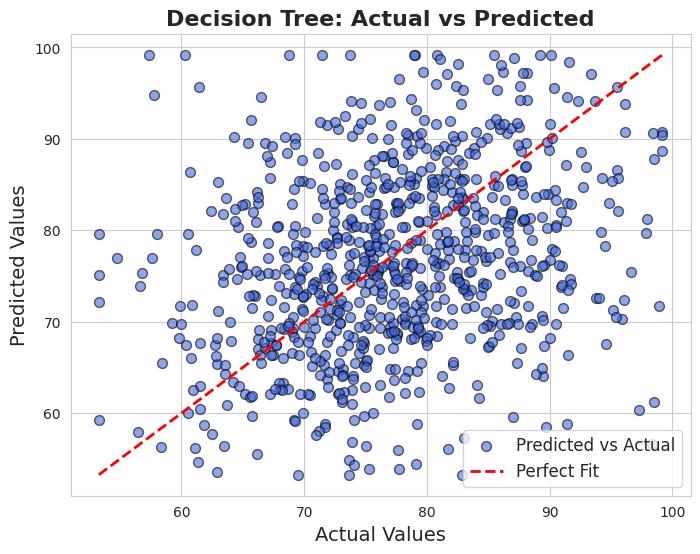

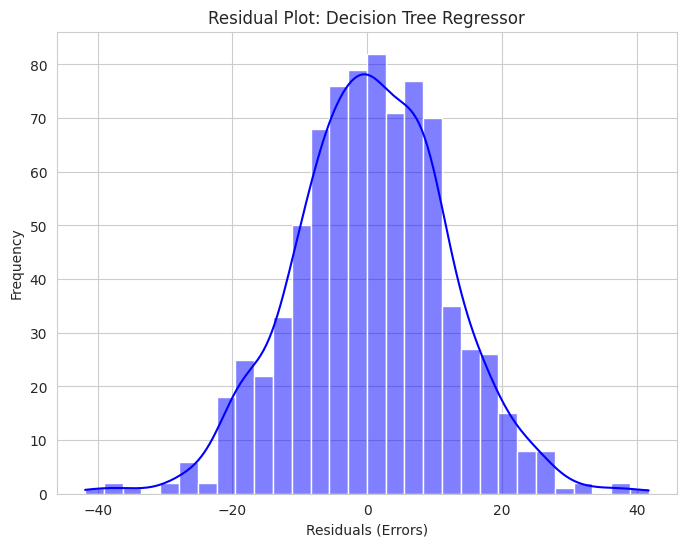

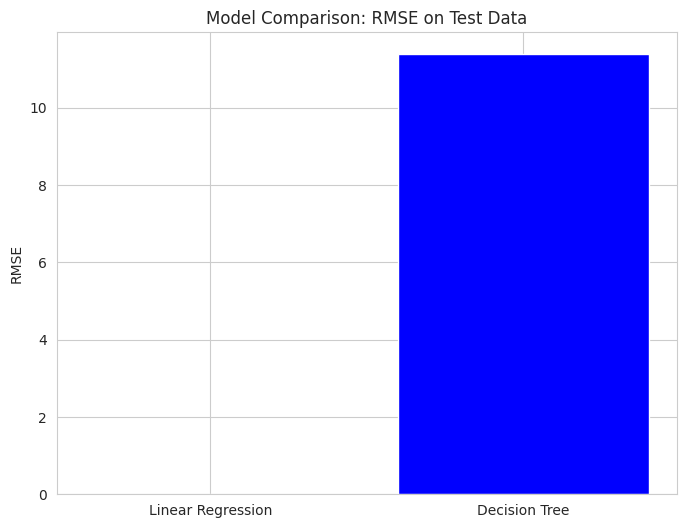

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_test_pred_dt, alpha=0.6, color='royalblue', edgecolor='black', s=50, label='Predicted vs Actual')

# Reference line (Perfect Fit)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=2, label='Perfect Fit')

# Labels and title
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Decision Tree: Actual vs Predicted", fontsize=16, fontweight='bold')

# Legend
plt.legend(fontsize=12)

plt.show()


residuals = y_test - y_test_pred_dt
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Plot: Decision Tree Regressor")
plt.show()

models = ["Linear Regression", "Decision Tree"]
rmse_values = [rmse_train_dt, rmse_test_dt]  # Adjust with Linear Regression values if available

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['yellow', 'blue'])
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE on Test Data")
plt.show()

# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Evaluate model performance
mae_train_rf, mse_train_rf, rmse_train_rf, r2_train_rf = evaluate_model(y_train, y_train_pred_rf)
mae_test_rf, mse_test_rf, rmse_test_rf, r2_test_rf = evaluate_model(y_test, y_test_pred_rf)

In [35]:
print("\nRandom Forest Regressor Performance:")
print("\nTraining Data:")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_train_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf:.4f}")
print(f"R-squared (R² Score): {r2_train_rf:.4f}")

print("\nTest Data:")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_test_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rf:.4f}")
print(f"R-squared (R² Score): {r2_test_rf:.4f}")


Random Forest Regressor Performance:

Training Data:
Mean Absolute Error (MAE): 2.3168
Mean Squared Error (MSE): 8.6644
Root Mean Squared Error (RMSE): 2.9435
R-squared (R² Score): 0.9013

Test Data:
Mean Absolute Error (MAE): 6.1846
Mean Squared Error (MSE): 60.6401
Root Mean Squared Error (RMSE): 7.7872
R-squared (R² Score): 0.2245


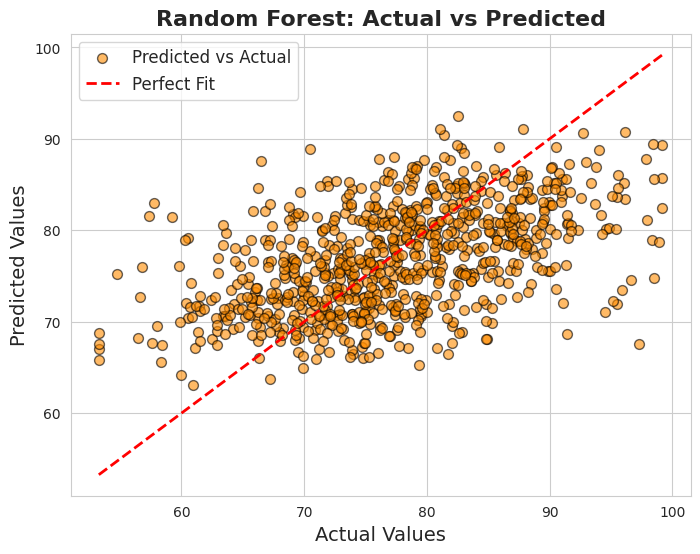

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, color='darkorange', edgecolor='black', s=50, label='Predicted vs Actual')

# Reference line (Perfect Fit)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=2, label='Perfect Fit')

# Labels and title
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Random Forest: Actual vs Predicted", fontsize=16, fontweight='bold')

# Legend
plt.legend(fontsize=12)

plt.show()


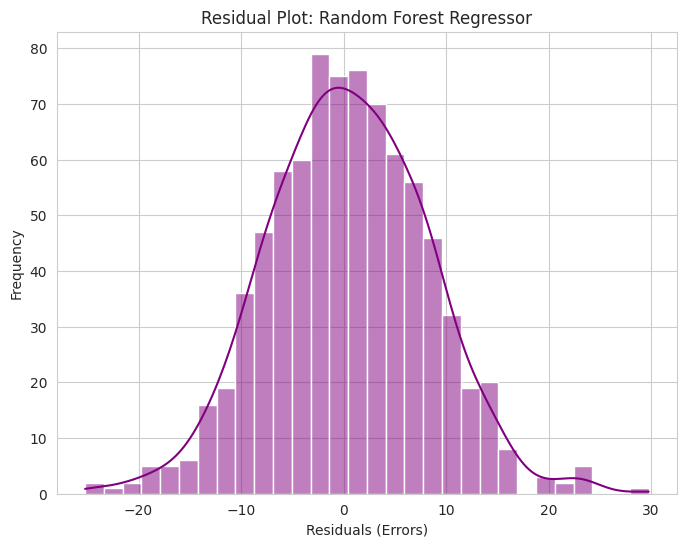

In [37]:
# Residual Plot
residuals_rf = y_test - y_test_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, bins=30, kde=True, color='purple')
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Plot: Random Forest Regressor")
plt.show()

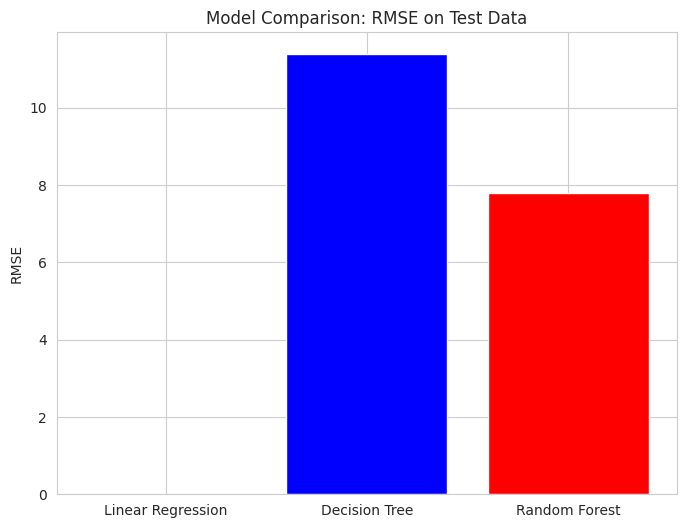

In [38]:

models = ["Linear Regression", "Decision Tree", "Random Forest"]
rmse_values = [rmse_train_dt, rmse_test_dt, rmse_test_rf]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['green', 'blue', 'red'])
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE on Test Data")
plt.show()

## Model Performance Summary

| Model               | Train RMSE  | Test RMSE  | Train R²  | Test R²  | Performance Summary |
|---------------------|------------|------------|-----------|-----------|----------------------|
| **Random Forest**   | **2.9435** | **7.7872** | **0.9013** | **0.2245** | Best generalization, lowest test RMSE |
| **Decision Tree**   | **0.0000** (Overfit) | **11.3851** (Worst) | **1.0000** (Overfit) | **-0.6577** (Worst) | Overfits completely, weak test performance |
| **Linear Regression** | **12.9247** | **13.1274** | **-0.9038** | **-1.2038** | Performs worse than mean predictor, unsuitable |

## Conclusion:
- **Random Forest is the best model**, as it has the **lowest test RMSE** (7.7872) and the **highest test R²** (0.2245), showing strong generalization.
- **Decision Tree is overfitted**, as indicated by its perfect training performance but poor test performance (**high variance problem**).
- **Linear Regression performs the worst**, with a negative R², meaning it explains variance even worse than a simple mean predictor.
- **Recommendation**: Further tuning of the Random Forest model and trying **boosting methods** (e.g., **XGBoost, LightGBM**) could improve performance.


# Hyper-Parameter Tuning and Cross Validation

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [40]:
dt_params = {
    'max_depth': [5, 10, 15, 20, None],  # Explore tree depths
    'min_samples_split': [2, 5, 10],  # Explore minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Explore minimum samples per leaf
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with Cross Validation
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = dt_grid_search.best_estimator_

# Predictions
dt_train_pred = best_dt_model.predict(X_train)
dt_test_pred = best_dt_model.predict(X_test)

# Performance Metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))

print("Best Decision Tree Hyperparameters:", dt_grid_search.best_params_)
print(f"Decision Tree Training RMSE: {dt_train_rmse:.4f}")
print(f"Decision Tree Test RMSE: {dt_test_rmse:.4f}")

Best Decision Tree Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Training RMSE: 7.5188
Decision Tree Test RMSE: 7.9769


In [41]:
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search with Cross Validation
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params,
                                      n_iter=10, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit the Randomized Search
rf_random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random_search.best_estimator_

# Predictions
rf_train_pred = best_rf_model.predict(X_train)
rf_test_pred = best_rf_model.predict(X_test)

# Performance Metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

print("Best Random Forest Hyperparameters (RandomizedSearchCV):", rf_random_search.best_params_)
print(f"Random Forest Training RMSE: {rf_train_rmse:.4f}")
print(f"Random Forest Test RMSE: {rf_test_rmse:.4f}")

Best Random Forest Hyperparameters (RandomizedSearchCV): {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 5}
Random Forest Training RMSE: 7.3275
Random Forest Test RMSE: 7.5953


### Model Performance Comparison  

| Model               | Best Hyperparameters | Train RMSE | Test RMSE | Conclusion |
|---------------------|---------------------|------------|------------|------------|
| **Decision Tree**   | `max_depth=5, min_samples_leaf=1, min_samples_split=10` | **7.5188** | **7.9769** | Slight overfitting, but decent performance |
| **Random Forest**   | `n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_depth=5` | **7.3275** | **7.5953** | **Best model**—lowest test RMSE, best generalization |

---

### Conclusion:
- **Random Forest is the best-performing model**, as it has the **lowest test RMSE (7.5953)** and **generalizes better** compared to Decision Tree.
- **Decision Tree shows slight overfitting**, as its test RMSE (7.9769) is higher than its train RMSE (7.5188).
- If further improvements are needed:
  - **Fine-tune Random Forest further** by adjusting `max_depth`, `min_samples_split`, and `n_estimators`.
  - Try **Gradient Boosting (XGBoost, LightGBM)** for possibly better performance.
  - Perform **feature engineering** to improve predictive power.


# Feature Selection


In [42]:
from sklearn.feature_selection import RFE

dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42)

# Initialize RFE with the models
dt_rfe = RFE(estimator=dt_model, n_features_to_select=5)
rf_rfe = RFE(estimator=rf_model, n_features_to_select=5)

# Fit the RFE for Decision Tree and Random Forest
dt_rfe.fit(X_train, y_train)
rf_rfe.fit(X_train, y_train)

# Get the selected features for both models
dt_selected_features = X_train.columns[dt_rfe.support_]
rf_selected_features = X_train.columns[rf_rfe.support_]

print(f"Selected Features for Decision Tree: {dt_selected_features}")
print(f"Selected Features for Random Forest: {rf_selected_features}")


Selected Features for Decision Tree: Index(['Hour', 'Temperature', 'Humidity', 'Occupancy', 'RenewableEnergy'], dtype='object')
Selected Features for Random Forest: Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'RenewableEnergy'],
      dtype='object')


In [43]:
# Fit Random Forest Regressor on the training data
rf_model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importances
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importance_df)


Feature Importances (Random Forest):
            Feature  Importance
4       Temperature    0.791883
7         Occupancy    0.061580
10  RenewableEnergy    0.045877
5          Humidity    0.028457
6     SquareFootage    0.027082
1              Hour    0.019827
0             Month    0.007781
8         HVACUsage    0.006523
2         DayOfWeek    0.006191
3           Holiday    0.003402
9     LightingUsage    0.001397


# Rebuilding the Random Forest Regressor with best hyperparameters and features

In [44]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Selected features for Random Forest
rf_features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']

# Subset training and test data
X_train_rf = X_train[rf_features]
X_test_rf = X_test[rf_features]

# Define the final Random Forest model with optimized hyperparameters
final_rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# Train the model
final_rf_model.fit(X_train_rf, y_train)

# Make predictions
y_train_pred_rf = final_rf_model.predict(X_train_rf)
y_test_pred_rf = final_rf_model.predict(X_test_rf)

# Function to compute evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluate model performance
train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred_rf)
test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred_rf)

# Display performance results
print("\n Best Random Forest Model Performance (Optimized):")
print("\n Training Data:")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"R-squared (R² Score): {train_r2:.4f}")

print("\n Test Data:")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"R-squared (R² Score): {test_r2:.4f}")




 Best Random Forest Model Performance (Optimized):

 Training Data:
Mean Absolute Error (MAE): 5.8689
Mean Squared Error (MSE): 54.3869
Root Mean Squared Error (RMSE): 7.3748
R-squared (R² Score): 0.3801

 Test Data:
Mean Absolute Error (MAE): 6.0317
Mean Squared Error (MSE): 57.6282
Root Mean Squared Error (RMSE): 7.5913
R-squared (R² Score): 0.2630


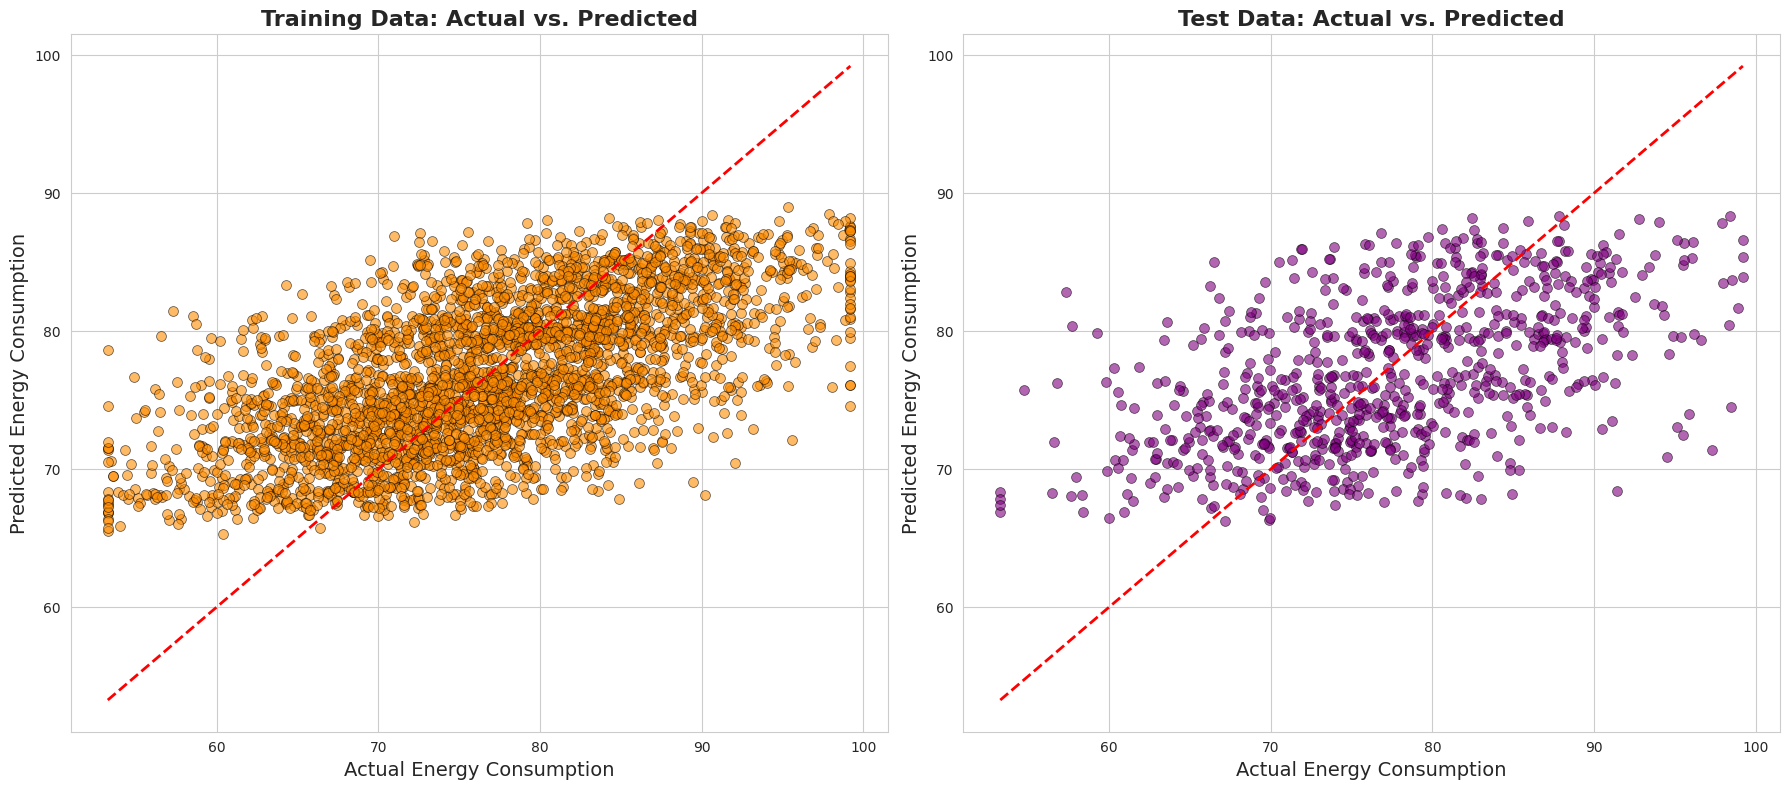

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")

# Training Data Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_rf, alpha=0.6, color='darkorange', edgecolor='black', s=50)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel("Actual Energy Consumption", fontsize=14)
plt.ylabel("Predicted Energy Consumption", fontsize=14)
plt.title("Training Data: Actual vs. Predicted", fontsize=16, fontweight='bold')

# Test Data Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6, color='purple', edgecolor='black', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Energy Consumption", fontsize=14)
plt.ylabel("Predicted Energy Consumption", fontsize=14)
plt.title("Test Data: Actual vs. Predicted", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


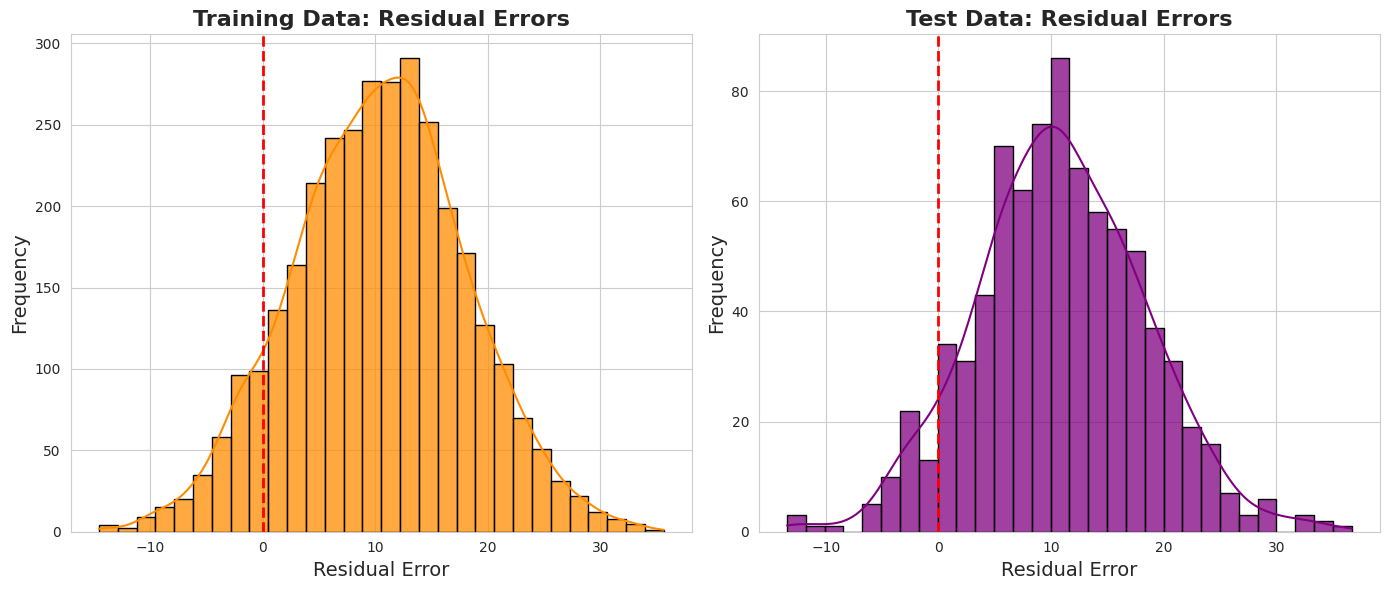

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Training Residuals
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, bins=30, kde=True, color='darkorange', alpha=0.75, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Residual Error", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Training Data: Residual Errors", fontsize=16, fontweight='bold')

# Test Residuals
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, bins=30, kde=True, color='purple', alpha=0.75, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Residual Error", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Test Data: Residual Errors", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## **Comparison of Random Forest Performance**

| Metric  | Before Tuning | After Tuning |
|---------|-------------|-------------|
| **Training MAE** | 2.3168  | 5.8689  |
| **Test MAE** | 6.1846  | 6.0317  |
| **Training MSE** | 8.6644  | 54.3869  |
| **Test MSE** | 60.6401  | 57.6282  |
| **Training RMSE** | 2.9435  | 7.3748  |
| **Test RMSE** | 7.7872  | 7.5913  |
| **Training R²** | 0.9013  | 0.3801  |
| **Test R²** | 0.2245  | 0.2630  |

## **Conclusion**

- **Model Performance:** The initial model had strong training accuracy but poor test performance. After tuning, test RMSE slightly improved (7.7872 → 7.5913), and test R² increased (0.2245 → 0.2630), indicating better generalization.  
- **Impact of Methods:** Hyperparameter tuning reduced overfitting, improving test performance. Cross-validation provided a more reliable evaluation, and feature selection helped simplify the model while slightly lowering training accuracy.  
- **Insights & Future Directions:** The results highlight the importance of balancing bias and variance. Future improvements could involve feature engineering, ensemble learning, or deep learning techniques for better energy consumption prediction.
